## For Boo3, model its orbit 1000x with uncertainties (Gaussian dist), compare with Carlin paper

In [25]:
# Importing our libraries and packages required for the orbit
from galpy.orbit import Orbit
from galpy import potential
import numpy as np
import matplotlib.pyplot as plt
from galpy.util import conversion

# Importing potentials.
from galpy.potential import MWPotential2014,ChandrasekharDynamicalFrictionForce,HernquistPotential,MovingObjectPotential

In [26]:
## 6D Data and uncertainties from Carlin's paper
sixD = [209.3, 26.8, 46.5, -1.14, -0.98, 197.5]
sigma = [0, 0, 2, 0.18, 0.20, 3.8]

pot = MWPotential2014
ro = 8.
vo = 220.
mo = conversion.mass_in_msol(ro=ro, vo=vo)
solarmotion = [-11.1, 12.24, 7.25]

# How many data points I want, taking into account the uncertainty
N_unc = 1000
sixD_unc = np.random.normal(loc=sixD, scale=sigma, size = (N_unc,6))

In [27]:
# Initializing the orbits
o = Orbit(sixD, radec=True, solarmotion=solarmotion)
o_unc = Orbit(sixD_unc, radec=True, solarmotion=solarmotion)

In [28]:
# Initializing the timescale, so that I can integrate backwards 5Gyrs
t = 5
to = conversion.time_in_Gyr(ro=ro,vo=vo)
n = 1001
ts= np.linspace(0.,-t/to,n)

In [29]:
# Integrating the orbits
o.integrate(ts, pot=pot)
o_unc.integrate(ts, pot=pot)

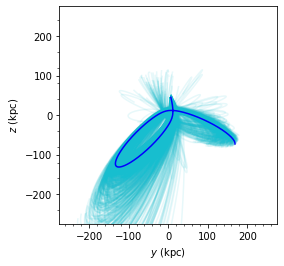

In [30]:
# Plotting.
o_unc.plot(d1='y', d2='z', alpha=0.1, c='#17becf')
o.plot(d1='y', d2='z', overplot=True, c='b')

ax = plt.gca()
ax.set_xlim(-275, 275)
ax.set_ylim(-275, 275)
ax.set_aspect('equal', adjustable='box')

In [33]:
p = o_unc.rperi()
a = o_unc.rap()

p_std = np.std(p)
a_std = np.std(a)
p_mean = np.mean(p)
a_mean = np.mean(a)

print('Pericentre error:', p_std, 'mean:', p_mean)
print('Apocentre error:', a_std, 'mean:', a_mean)

Pericentre error: 5.708477070020651 mean: 12.643926093819188
Apocentre error: 114.58367222384356 mean: 231.959203824615
